<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset (`breast-cancer-wisconsin-data-old.csv`). The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [20]:
import itertools
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [2]:
file = 'C:/Users/cdaniels/OneDrive - The University of Waikato/Documents/IOD/Data/breast-cancer-wisconsin-data-old.csv'
col = [
    'Sample_Number',
    'Clump_Thickness',
    'Uniformity_of_Cell_Size',
    'Uniformity_of_Cell_Shape',
    'Marginal_Adhesion',
    'Single_Epithelial_Cell_Size',
    'Bare_Nuclei',
    'Bland_Chromatin',
    'Normal_Nucleoli',
    'Mitoses',
    'Class'
]
df = pd.read_csv(file,names=col)
df.set_index('Sample_Number', inplace=True)
df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_Number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [3]:
# Check for nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_Thickness              699 non-null    int64 
 1   Uniformity_of_Cell_Size      699 non-null    int64 
 2   Uniformity_of_Cell_Shape     699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


In [4]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')
df.dropna(subset=['Bare_Nuclei'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_Thickness              683 non-null    int64  
 1   Uniformity_of_Cell_Size      683 non-null    int64  
 2   Uniformity_of_Cell_Shape     683 non-null    int64  
 3   Marginal_Adhesion            683 non-null    int64  
 4   Single_Epithelial_Cell_Size  683 non-null    int64  
 5   Bare_Nuclei                  683 non-null    float64
 6   Bland_Chromatin              683 non-null    int64  
 7   Normal_Nucleoli              683 non-null    int64  
 8   Mitoses                      683 non-null    int64  
 9   Class                        683 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 58.7 KB


9 features

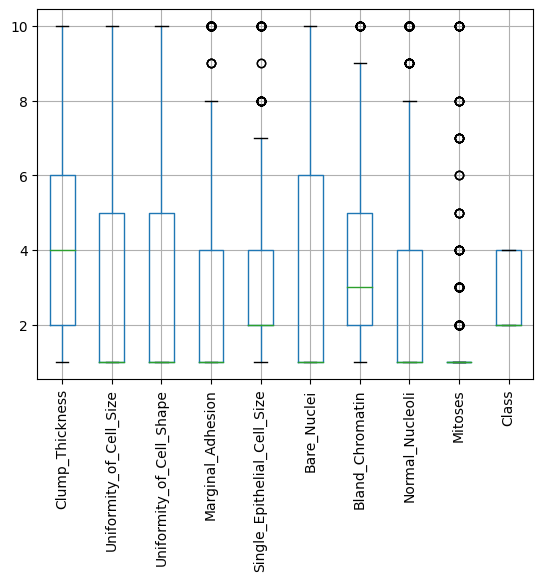

In [5]:
# Check for outliers

df.boxplot()
plt.xticks(rotation=90)
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

In [6]:
# Normalize data
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
678,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000,0.0
679,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.0
680,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111,1.0
681,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000,1.0


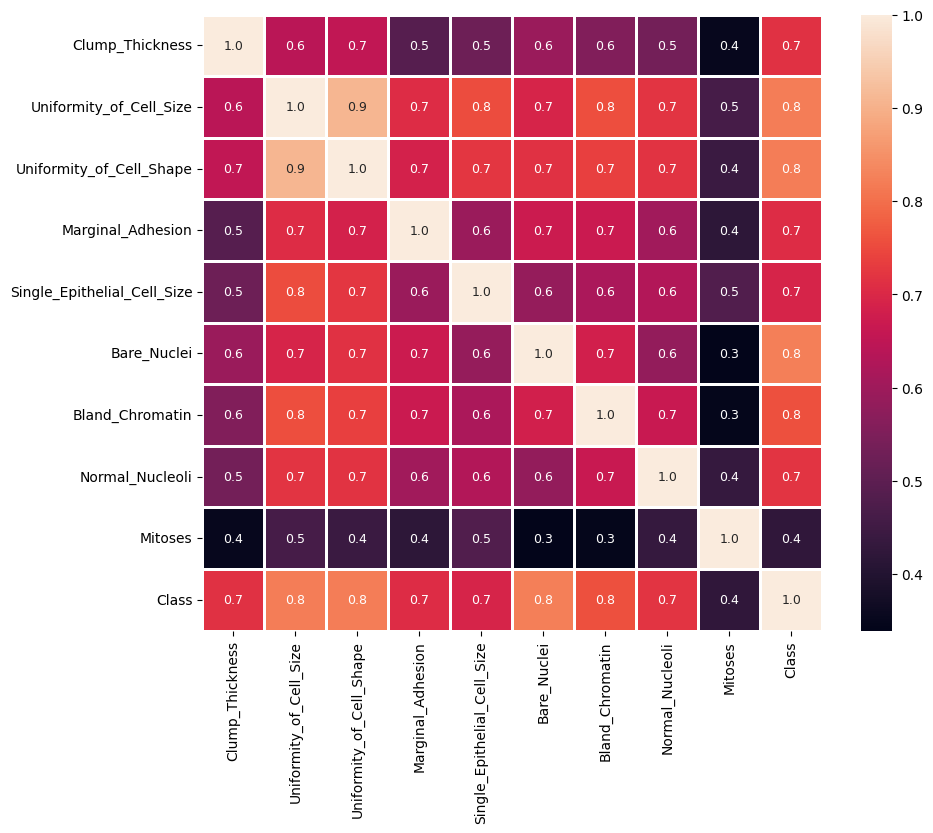

In [7]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".1f",annot_kws={"fontsize": 9},linewidths=1)
plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

The features are:

**Clump_Thickness**

**Uniformity_of_Cell_Size**

**Uniformity_of_Cell_Shape**

**Marginal_Adhesion**

**Single_Epithelial_Cell_Size**

**Bare_Nuclei**

**Bland_Chromatin**

**Normal_Nucleoli**

**Mitoses**

The label is Class.

After scaling, the label is binary.

Because we have a defined label, this is a supervised model.

Because the label output is binary, the modelling would be a binary classification model.



# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [13]:
# Define Target, Predictors
X = df_normalized.drop(columns=['Class'])
y = df['Class'].replace({2: 0, 4: 1})

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)

In [12]:
# Check for imbalanced target data
y.value_counts()

0    444
1    239
Name: Class, dtype: int64

In [16]:
# Apply Random Under-Sampling to the training data only
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [17]:
# Define the base estimator
dt = DecisionTreeClassifier()

In [18]:
# Create the bagging classifiers
bagging_dt = BaggingClassifier(dt)

In [19]:
# Fit model
bagging_dt.fit(X_res, y_res)

BaggingClassifier(estimator=DecisionTreeClassifier())

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [21]:
# Use the training data to make predictions
y_train_pred = bagging_dt.predict(X_res)

# Check for overfitting
print("Training Accuracy: ", accuracy_score(y_res, y_train_pred))

# Check the Training Results with the Training Predictions during development
print(classification_report(y_res, y_train_pred))

Training Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       167

    accuracy                           1.00       334
   macro avg       1.00      1.00      1.00       334
weighted avg       1.00      1.00      1.00       334



# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [22]:
y_test_pred = bagging_dt.predict(X_test)

# Check the Test Results with the Test Predictions
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test Accuracy:  0.9365853658536586
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       133
           1       0.88      0.94      0.91        72

    accuracy                           0.94       205
   macro avg       0.93      0.94      0.93       205
weighted avg       0.94      0.94      0.94       205



# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

#### Answer

The model can be used to predict if a person is diagnosed with a **Benign** or **Malignant** cancer.



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



